In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1
athletes_info = pd.DataFrame(pd.read_csv('athlete_events.csv'))

In [15]:
#2
athletes_info.info()
athletes_info.count()

print(athletes_info['Sport'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Compet

In [4]:
#3
print(athletes_info[['Age', 'Height', 'Weight']].describe())

                 Age         Height         Weight
count  261642.000000  210945.000000  208241.000000
mean       25.556898     175.338970      70.702393
std         6.393561      10.518462      14.348020
min        10.000000     127.000000      25.000000
25%        21.000000     168.000000      60.000000
50%        24.000000     175.000000      70.000000
75%        28.000000     183.000000      79.000000
max        97.000000     226.000000     214.000000


In [5]:
#4.1
athletes_1992_info = athletes_info[athletes_info['Year'] == 1992] #маска
yong_atheletes_1992_info = athletes_1992_info.loc[athletes_1992_info['Age'].idxmin()]

print(yong_atheletes_1992_info['Name'],
      yong_atheletes_1992_info['Event'])

Carlos Bienvenido Front Barrera Rowing Men's Coxed Eights


In [ ]:
#4.2
print(len(athletes_info['Sport'].unique()))


66


In [7]:
#4.3
female_tennis_2000_info = athletes_info[
    (athletes_info['Year'] == 2000) & 
    (athletes_info['Sex'] == "F") & 
    (athletes_info['Sport'] == "Tennis")]

print(female_tennis_2000_info["Height"].mean())

171.792


In [8]:
#4.4
china_gold_table_tennis_summer_2008 = athletes_info[
    (athletes_info['Year'] == 2008) & 
    (athletes_info['Medal'] == "Gold") & 
    (athletes_info['NOC'] == "CHN") & 
    (athletes_info['Sport'] == "Table Tennis")]

print(len(china_gold_table_tennis_summer_2008["Medal"]))

8


In [9]:
#4.5
summer_sports_1988_info = athletes_info[
    (athletes_info['Year'] == 1988) &
    (athletes_info['Season'] == "Summer")]
summer_sports_2004_info = athletes_info[
    (athletes_info['Year'] == 2004) &
    (athletes_info['Season'] == "Summer")]

print(f'В 1988 было: {summer_sports_1988_info['Sport'].nunique()} видов спорта, в 2004: {summer_sports_2004_info['Sport'].nunique()}')


В 1988 было: 27 видов спорта, в 2004: 34


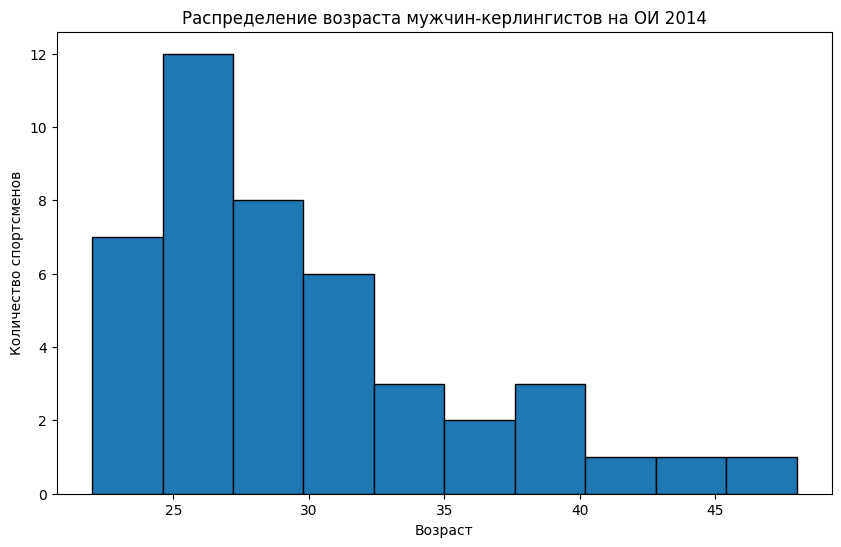

In [10]:
#4.6
curling_male_2014_info = athletes_info[
    (athletes_info['Year'] == 2014) &
    (athletes_info['Sport'] == "Curling") &
    (athletes_info['Sex'] == "M")] 

plt.figure(figsize=(10, 6))
plt.hist(curling_male_2014_info['Age'].dropna(), bins=10, edgecolor='black')
plt.title('Распределение возраста мужчин-керлингистов на ОИ 2014')
plt.xlabel('Возраст')
plt.ylabel('Количество спортсменов')
plt.show()

In [11]:
#4.7
athletes_winter_2006_info = athletes_info[(athletes_info['Year'] == 2006) & (athletes_info['Season'] == 'Winter')]
winter_2006_medals = athletes_winter_2006_info.dropna(subset=['Medal'])

country_stats_2006 = winter_2006_medals.groupby('NOC').agg( #groupby - позволяет сгруппировать значения, а также применнить функции при помощи .agg
    Medals=('Medal', 'count'),
    AverageAge=('Age', 'mean')
).sort_values(by='Medals', ascending=False) #ascending=False соритировка по убыванию

print(country_stats_2006.head(10))

     Medals  AverageAge
NOC                    
CAN      69   27.449275
SWE      64   27.187500
GER      54   28.777778
USA      52   24.519231
RUS      41   28.024390
FIN      41   28.195122
AUT      30   27.333333
CZE      27   29.814815
ITA      25   29.360000
NOR      23   29.782609


In [12]:
#4.8
pivot_table_2006 = pd.pivot_table(
    winter_2006_medals,
    values='ID',
    index='NOC',
    columns='Medal',
    aggfunc='count',
    fill_value=0 #замена пропущенных значений
)

pivot_table_2006 = pivot_table_2006[['Gold', 'Silver', 'Bronze']]

print("Сводная таблица по медалям (ОИ 2006, Зима):")
print(pivot_table_2006.head(10))

Сводная таблица по медалям (ОИ 2006, Зима):
Medal  Gold  Silver  Bronze
NOC                        
AUS       1       0       1
AUT      16       7       7
BLR       0       1       0
BUL       0       1       0
CAN      30      28      11
CHN       2       5       6
CRO       1       2       0
CZE       1       2      24
EST       3       0       0
FIN       0      34       7
